In [72]:
#import dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key

In [73]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [74]:
#create a set of 1500 random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [75]:
#add coordinates to a list
coordinates = list(lat_lngs)

In [76]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
# Count amount of unique cities
len(cities)

658

In [77]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_hum = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_hum,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | aldan
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | aklavik
Processing Record 6 of Set 1 | nesna
Processing Record 7 of Set 1 | nome
Processing Record 8 of Set 1 | melekhovskaya
City not found. Skipping...
Processing Record 9 of Set 1 | lukulu
Processing Record 10 of Set 1 | ishigaki
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | mozarlandia
Processing Record 13 of Set 1 | okhotsk
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | inongo
Processing Record 16 of Set 1 | galbshtadt
Processing Record 17 of Set 1 | labuhan
Processing Record 18 of Set 1 | ambovombe
Processing Record 19 of Set 1 | edd
Processing Record 20 of Set 1 | santa cruz
Processing Record 21 of Set 1 | port blair
Processing Record 22 of Set 1 | hend

Processing Record 39 of Set 4 | ziro
Processing Record 40 of Set 4 | huron
Processing Record 41 of Set 4 | yagodnoye
Processing Record 42 of Set 4 | filadelfia
Processing Record 43 of Set 4 | kudat
Processing Record 44 of Set 4 | saint-lo
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | tateyama
Processing Record 47 of Set 4 | trinidad
Processing Record 48 of Set 4 | avera
Processing Record 49 of Set 4 | tuatapere
Processing Record 50 of Set 4 | rosia
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | yumen
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | port-cartier
Processing Record 5 of Set 5 | avarua
Processing Record 6 of Set 5 | novaya ladoga
Processing Record 7 of Set 5 | lodja
Processing Record 8 of Set 5 | ponta do sol
Processing Record 9 of Set 5 | hithadhoo
Processing Record 10 of Set 5 | saint andrews
Processing Record 11 of Set 5 | russell
Processing Record 12 of Set 5 | maldonado
Processing R

Processing Record 31 of Set 8 | bandarbeyla
Processing Record 32 of Set 8 | saint pete beach
Processing Record 33 of Set 8 | maceio
Processing Record 34 of Set 8 | lastoursville
Processing Record 35 of Set 8 | tuktoyaktuk
Processing Record 36 of Set 8 | eureka
Processing Record 37 of Set 8 | leo
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | college
Processing Record 40 of Set 8 | chateau-thierry
Processing Record 41 of Set 8 | la ronge
Processing Record 42 of Set 8 | zhigansk
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | freeport
Processing Record 45 of Set 8 | christchurch
Processing Record 46 of Set 8 | jitauna
Processing Record 47 of Set 8 | ponta delgada
Processing Record 48 of Set 8 | axim
Processing Record 49 of Set 8 | de aar
Processing Record 50 of Set 8 | kabo
Processing Record 1 of Set 9 | clyde river
Processing Record 2 of Set 9 | teluk nibung
Processing Record 3 of Set 9 | corn island
Processing Record 4 of Set 9

Processing Record 15 of Set 12 | huilong
Processing Record 16 of Set 12 | evenskjaer
City not found. Skipping...
Processing Record 17 of Set 12 | sechelt
Processing Record 18 of Set 12 | shar
Processing Record 19 of Set 12 | auki
Processing Record 20 of Set 12 | faanui
Processing Record 21 of Set 12 | maykain
City not found. Skipping...
Processing Record 22 of Set 12 | rio gallegos
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | vysokogornyy
Processing Record 25 of Set 12 | pedasi
Processing Record 26 of Set 12 | la baule-escoublac
Processing Record 27 of Set 12 | kabinda
Processing Record 28 of Set 12 | ozernovskiy
Processing Record 29 of Set 12 | pindiga
Processing Record 30 of Set 12 | muros
Processing Record 31 of Set 12 | kjollefjord
Processing Record 32 of Set 12 | tautira
Processing Record 33 of Set 12 | mwene-ditu
Processing Record 34 of Set 12 | san matias
Processing Record 35 of Set 12 | torbay
Processing Record 36 of Set 12 | lazurne
Processing Re

In [78]:
#convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,75,40,13.80,AR,2022-05-15 04:31:30
1,Aldan,58.6031,125.3894,34.30,75,100,7.14,RU,2022-05-15 04:31:31
2,Port Elizabeth,-33.9180,25.5701,46.69,93,0,4.61,ZA,2022-05-15 04:31:31
3,Aklavik,68.2191,-135.0107,29.07,79,96,2.06,CA,2022-05-15 04:31:32
4,Nesna,66.1967,13.0213,40.66,87,100,24.00,NO,2022-05-15 04:31:32


In [79]:
#reorder column order
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-05-15 04:31:30,-54.8000,-68.3000,42.46,75,40,13.80
1,Aldan,RU,2022-05-15 04:31:31,58.6031,125.3894,34.30,75,100,7.14
2,Port Elizabeth,ZA,2022-05-15 04:31:31,-33.9180,25.5701,46.69,93,0,4.61
3,Aklavik,CA,2022-05-15 04:31:32,68.2191,-135.0107,29.07,79,96,2.06
4,Nesna,NO,2022-05-15 04:31:32,66.1967,13.0213,40.66,87,100,24.00


In [80]:
#create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

#port the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [81]:
#extract relevant fields from the DataFrom for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

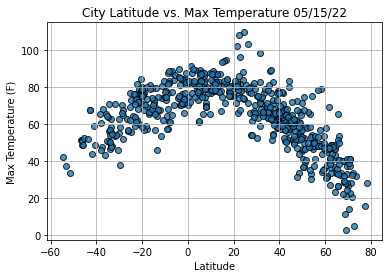

In [82]:
#import the time module
import time

#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps, 
            edgecolor='Black', linewidth=1,marker='o',
           alpha=0.8, label='Cities')

#icorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig1.png')

#show the plot
plt.show()

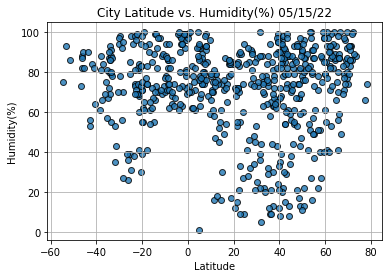

In [83]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity, 
            edgecolor='Black', linewidth=1,marker='o',
           alpha=0.8, label='Cities')

#icorporate the other graph properties
plt.title(f"City Latitude vs. Humidity(%) " + time.strftime('%x'))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig2.png')

#show the plot
plt.show()

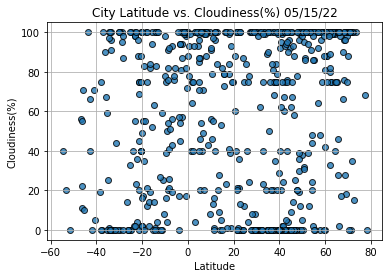

In [84]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness, 
            edgecolor='Black', linewidth=1,marker='o',
           alpha=0.8, label='Cities')

#icorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%) " + time.strftime('%x'))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig3.png')

#show the plot
plt.show()

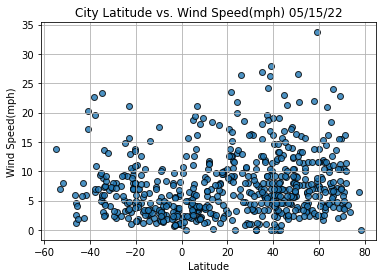

In [85]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed, 
            edgecolor='Black', linewidth=1,marker='o',
           alpha=0.8, label='Cities')

#icorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed(mph) " + time.strftime('%x'))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig('weather_data/Fig4.png')

#show the plot
plt.show()

In [86]:
#import linregress
from scipy.stats import linregress

#create a function to perform linear regression on the weather data
#and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        
        #run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
        #calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        
        #get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        #create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values, 'r')
        
        #annotate the text for the line equation
        plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [87]:
#this presents all the information on index # 13
index13 = city_data_df.loc[13]
index13

City                   Galbshtadt
Country                        RU
Date          2022-05-15 04:31:35
Lat                       53.2264
Lng                       78.9845
Max Temp                    65.44
Humidity                       51
Cloudiness                    100
Wind Speed                   7.63
Name: 13, dtype: object

In [88]:
#returns True/False if a city on city_data_df has latitude greater or equal than 0
city_data_df['Lat'] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
597     True
598     True
599     True
600     True
601     True
Name: Lat, Length: 602, dtype: bool

In [89]:
#creates a DataFrame with all cities information with Latitude greater or equal than 0 - Displays Northern Hemisphere Data
city_data_df[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Aldan,RU,2022-05-15 04:31:31,58.6031,125.3894,34.30,75,100,7.14
3,Aklavik,CA,2022-05-15 04:31:32,68.2191,-135.0107,29.07,79,96,2.06
4,Nesna,NO,2022-05-15 04:31:32,66.1967,13.0213,40.66,87,100,24.00
5,Nome,US,2022-05-15 04:31:32,64.5011,-165.4064,33.87,93,100,10.36
7,Ishigaki,JP,2022-05-15 04:31:33,24.3448,124.1572,73.53,94,75,21.85


In [90]:
#assigns variable to the dataframe above which is the Northern Hemisphere
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

#assigns variable to Southern Hemisphere DataFrame we create
southern_hemi_df = city_data_df[(city_data_df['Lat'] <= 0)]

#displays southern hemisphere data
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-05-15 04:31:30,-54.8000,-68.3000,42.46,75,40,13.80
2,Port Elizabeth,ZA,2022-05-15 04:31:31,-33.9180,25.5701,46.69,93,0,4.61
6,Lukulu,ZM,2022-05-15 04:31:33,-14.3707,23.2420,57.00,66,1,6.24
8,Hobart,AU,2022-05-15 04:31:33,-42.8794,147.3294,67.86,53,40,8.05
9,Mozarlandia,BR,2022-05-15 04:31:34,-14.7447,-50.5706,71.71,55,63,2.62


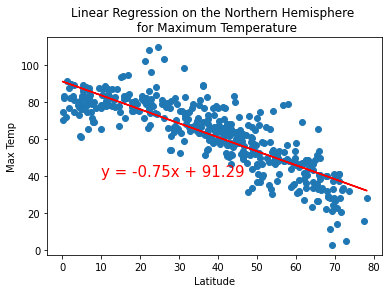

<Figure size 432x288 with 0 Axes>

In [91]:
#Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

plt.savefig('weather_data/Fig5.png')
plt.show()

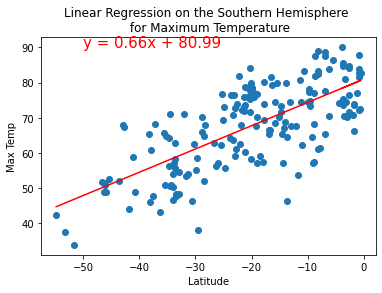

<Figure size 432x288 with 0 Axes>

In [92]:
#linear regression on the southern hemisphere for maximum temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Max Temp']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', "Max Temp", (-50,90))

plt.savefig('weather_data/Fig6.png')
plt.show()

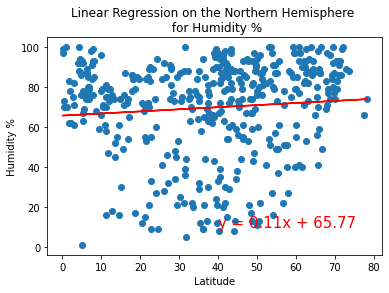

<Figure size 432x288 with 0 Axes>

In [93]:
#linear regression on the northern hemisphere for humidity %
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Humidity %', 'Humidity %', (40,10))

plt.savefig('weather_data/Fig7.png')
plt.show()

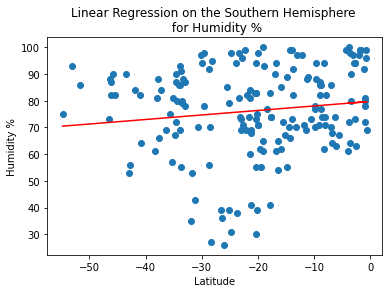

<Figure size 432x288 with 0 Axes>

In [94]:
#linear regression on the southern hemisphere for humidity %
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Humidity %', 'Humidity %', (-50,15))

plt.savefig('weather_data/Fig8.png')
plt.show()

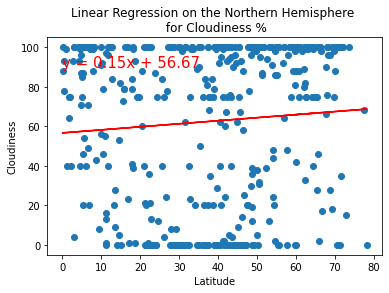

<Figure size 432x288 with 0 Axes>

In [95]:
#linear regression on the cloudiness of northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Cloudiness %', 'Cloudiness', (0,90))

plt.savefig('weather_data/Fig9.png')
plt.show()

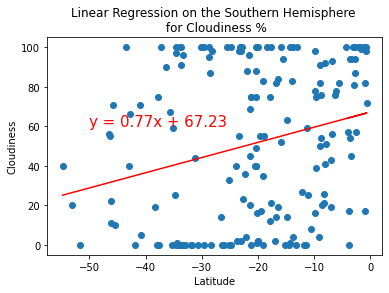

<Figure size 432x288 with 0 Axes>

In [98]:
#linear regression on the cloudiness of southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Cloudiness %', 'Cloudiness', (-50,60))

plt.savefig('weather_data/Fig9.png')
plt.show()

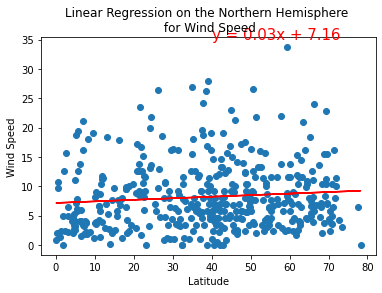

<Figure size 432x288 with 0 Axes>

In [99]:
#linear regression on the wind speed of northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (40,35))

plt.savefig('weather_data/Fig10.png')
plt.show()

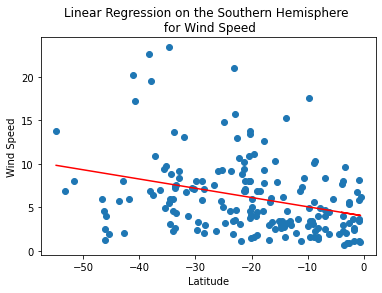

<Figure size 432x288 with 0 Axes>

In [101]:
#linear regression on the wind speed of northern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,35))

plt.savefig('weather_data/Fig11.png')
plt.show()